In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-housing-market-analysis-2015-2024")

print("Path to dataset files:", path)

import pandas as pd
# Load the dataset
data = pd.read_csv(path + "/global_housing_market_extended.csv")
print(data.head())

Path to dataset files: /Users/rileyhaynie15/.cache/kagglehub/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024/versions/1
  Country  Year  House Price Index  Rent Index  Affordability Ratio  \
0     USA  2015         117.454012  116.550001             9.587945   
1     USA  2016         150.807258   51.440915            11.729189   
2     USA  2017         123.194502   70.386040             8.506676   
3     USA  2018         131.423444   91.469020             3.418054   
4     USA  2019         110.461377   56.837048             9.158097   

   Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
0           4.493292            1.514121       -0.752044   
1           5.662213            1.880204       -0.545400   
2           2.197469            2.398940        0.930895   
3           4.537724            1.608407       -1.479587   
4           3.700762            1.293249        1.961415   

   Population Growth (%)  Urbanization Rate (%)  Construction Index  
0 

/var/folders/pn/7n09rhd56t9dc86jswzv9q5m0000gn/T/ipykernel_61571/58733003.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=year_col, y=hpi_col, ci=None)


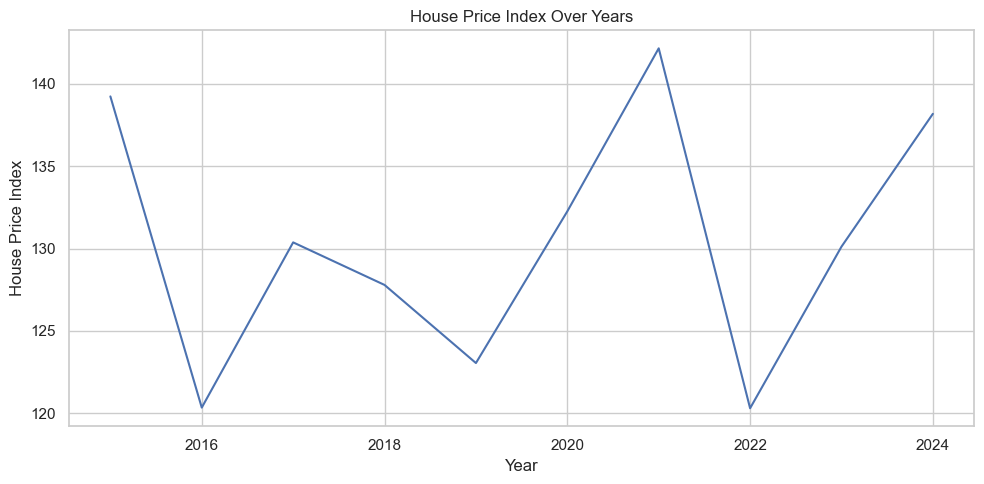

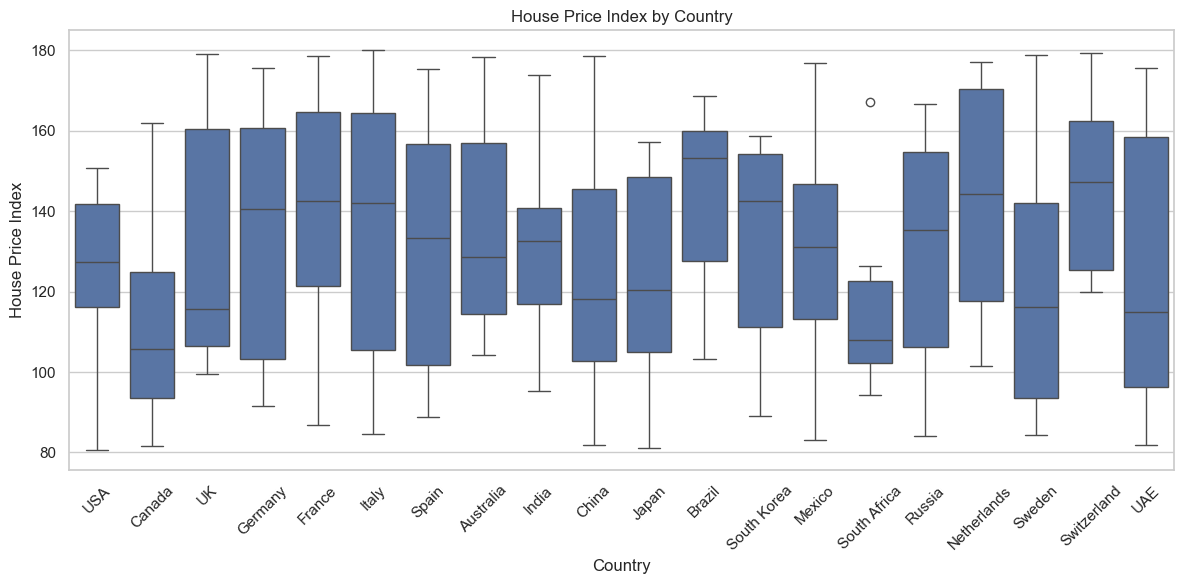

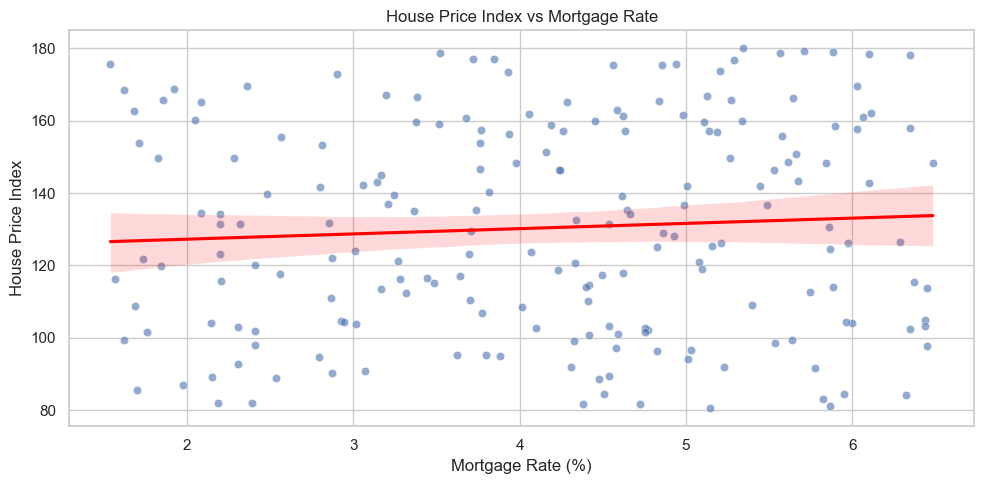

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Define column names (adjust if your dataset has different column names)
hpi_col = 'House Price Index'
year_col = 'Year'
country_col = 'Country'
mortgage_col = 'Mortgage Rate (%)'

# Step 3: Drop rows with missing values in relevant columns
df = data[[hpi_col, year_col, country_col, mortgage_col]].dropna()

# Step 4: Set the seaborn theme for better aesthetics
sns.set(style="whitegrid")

# Plot 1: Housing Price Index over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=year_col, y=hpi_col, ci=None)
plt.title("House Price Index Over Years")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.tight_layout()
plt.show()

# Plot 2: Housing Price Index by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=country_col, y=hpi_col)
plt.title("House Price Index by Country")
plt.xlabel("Country")
plt.ylabel("House Price Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Housing Price Index vs Mortgage Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=mortgage_col, y=hpi_col, alpha=0.6)
sns.regplot(data=df, x=mortgage_col, y=hpi_col, scatter=False, color="red")
plt.title("House Price Index vs Mortgage Rate")
plt.xlabel("Mortgage Rate (%)")
plt.ylabel("House Price Index")
plt.tight_layout()
plt.show()
